# Loan Status Prediction

In [2]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading our train dataset

train_loan_df = pd.read_csv('Loan_Status_train.csv')


In [4]:
# to get the first five rows

train_loan_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# to get the last five rows

train_loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
# to get the shape of the datafrane (i.e) the no.of rows and columns

train_loan_df.shape

(614, 13)

In [7]:
# to get the info of the dataframe

train_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# to get the statistical data

train_loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# to get the unique values

train_loan_df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
# to get number and names of features

train_loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
# to get the types of the features

train_loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
# to get the no.of.missing values in each columns

train_loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# imputing the null values by using mode for the categorical values

train_loan_df['Gender'] = train_loan_df['Gender'].fillna(train_loan_df['Gender'].mode()[0])
train_loan_df['Married'] = train_loan_df['Married'].fillna(train_loan_df['Married'].mode()[0])
train_loan_df['Dependents'] = train_loan_df['Dependents'].fillna(train_loan_df['Dependents'].mode()[0])
train_loan_df['Self_Employed'] = train_loan_df['Self_Employed'].fillna(train_loan_df['Self_Employed'].mode()[0])

In [14]:
# imputing the null values by using median for the numerical values

train_loan_df['LoanAmount'] = train_loan_df['LoanAmount'].fillna(train_loan_df['LoanAmount'].median())
train_loan_df['Loan_Amount_Term'] = train_loan_df['Loan_Amount_Term'].fillna(train_loan_df['Loan_Amount_Term'].median())
train_loan_df['Credit_History'] = train_loan_df['Credit_History'].fillna(train_loan_df['Credit_History'].median())

In [15]:
# now check if there is any missing values after imputing 

train_loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
# to check the shape

train_loan_df.shape

(614, 13)

In [17]:
# now to drop the duplicate records

train_loan_df.drop_duplicates(inplace = True)

In [18]:
# now check the shape of the dataframe

train_loan_df.shape

(614, 13)

No duplicates were found in the dataframe

In [19]:
# replacing the alphabetical value with numerical value (Label Encoding)

train_loan_df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [20]:
# now check the values are replaced by seeing the first 5 rows

train_loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [21]:
# we know that in the Loan Status column there are labeled values so that, we changed that into 1 & 0
# likewise check for the Dependents also

train_loan_df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
# here we can't accept the values as 3+,it'll affect the performance of the model, so we are goingbto replace it by 4

train_loan_df = train_loan_df.replace(to_replace='3+', value=4)

In [23]:
# now check the values of the dependents to ensure whether it is changed or not

train_loan_df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [24]:
# now we are going to do data visualization to understand the various relationship between various features

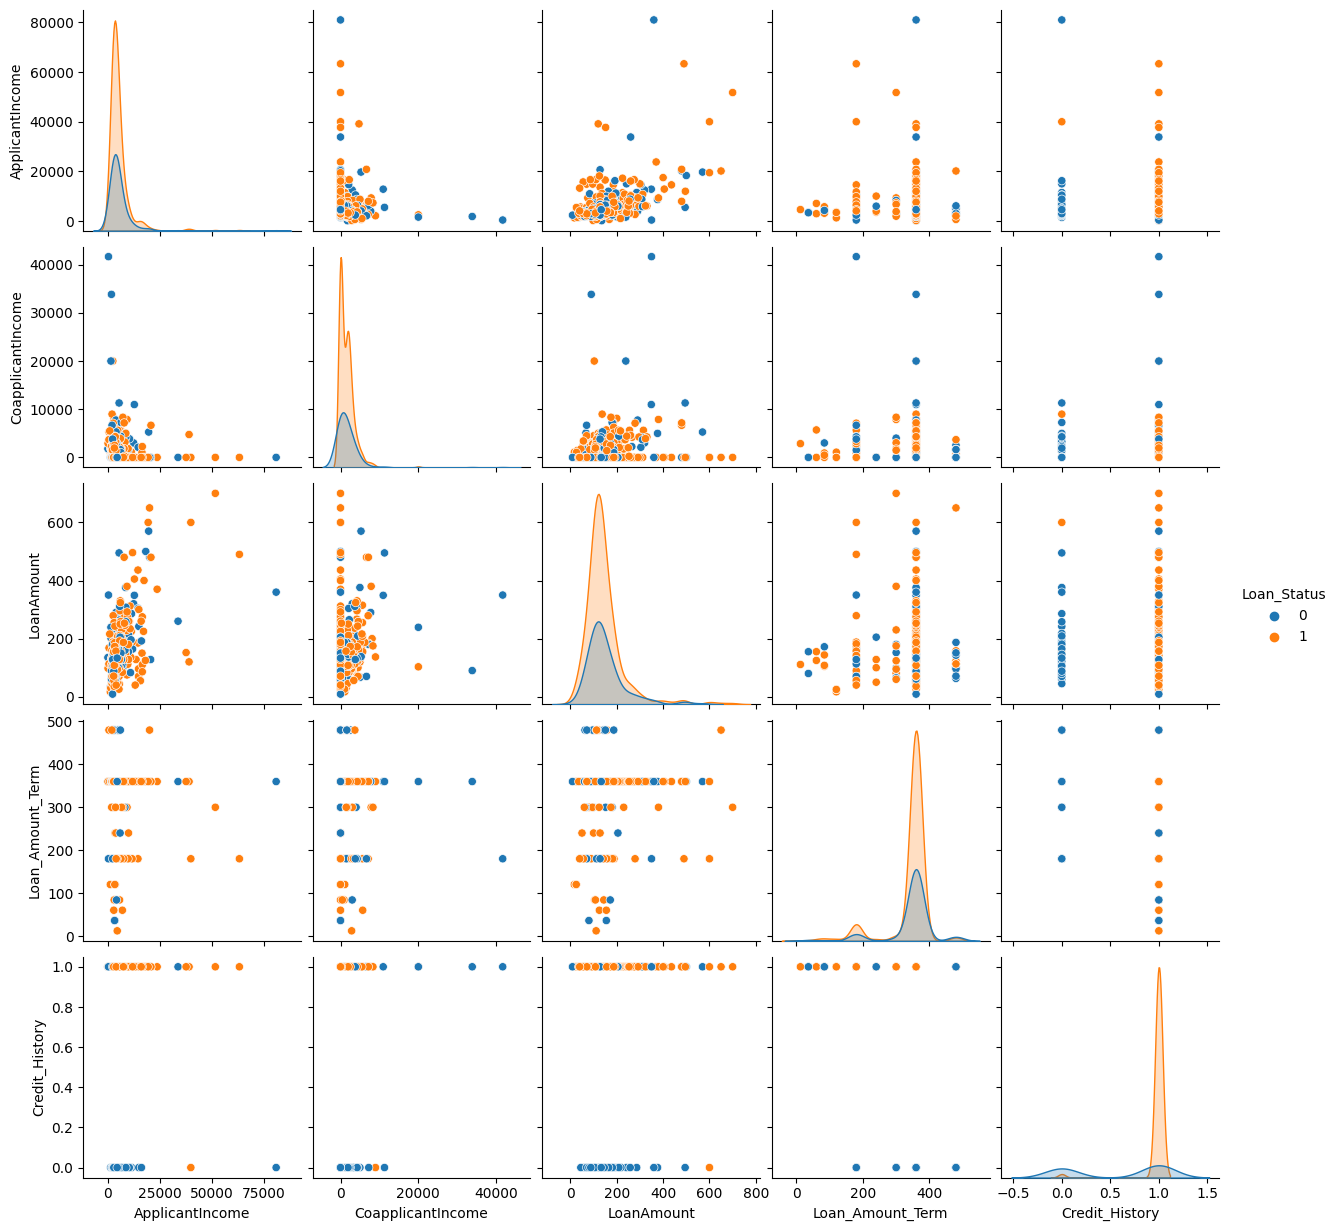

In [25]:
sns.pairplot(data= train_loan_df, hue= "Loan_Status")
plt.show()

<AxesSubplot: xlabel='Education', ylabel='count'>

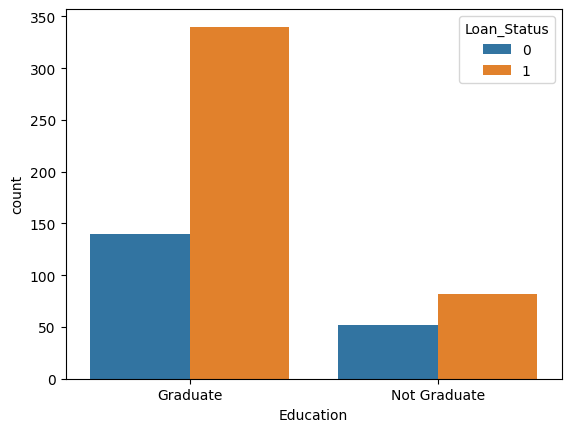

In [26]:
# at first we are going to check with education and loan status

sns.countplot(x='Education', hue='Loan_Status', data=train_loan_df)

<AxesSubplot: xlabel='Married', ylabel='count'>

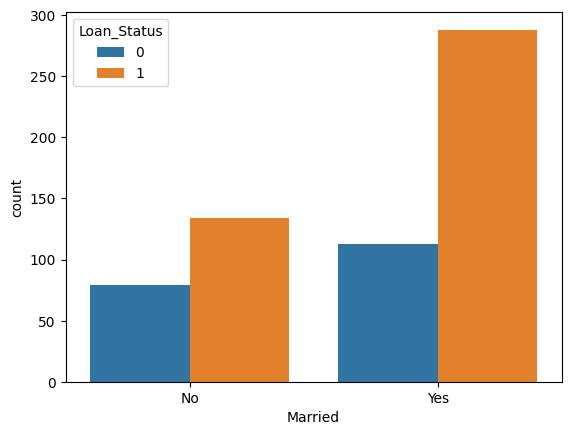

In [27]:
# now do the same for the marital status and Loan status

sns.countplot(x='Married', hue='Loan_Status', data=train_loan_df)

<AxesSubplot: xlabel='Gender', ylabel='count'>

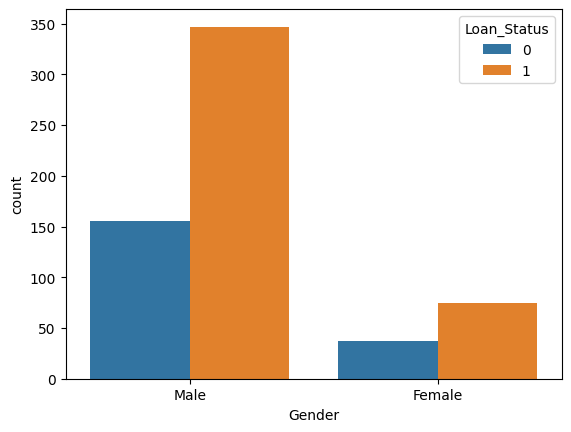

In [28]:
# now do the same for the gender and Loan status

sns.countplot(x='Gender', hue='Loan_Status', data=train_loan_df)

In [29]:
# now check the values of the self employed 

train_loan_df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

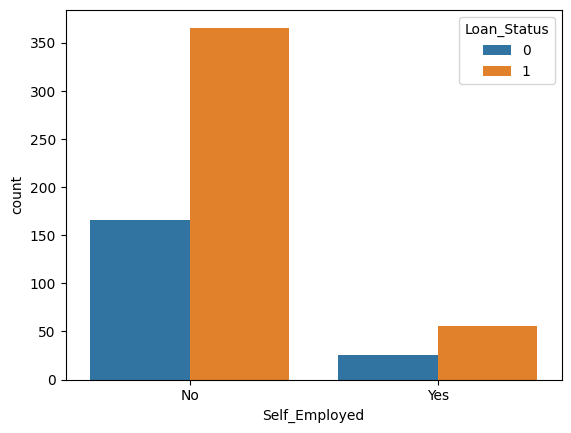

In [30]:
# now visualize and see whether this self employed feature is making an impact on loan status 

sns.countplot(x='Self_Employed', hue='Loan_Status', data=train_loan_df)

<AxesSubplot: xlabel='Dependents', ylabel='count'>

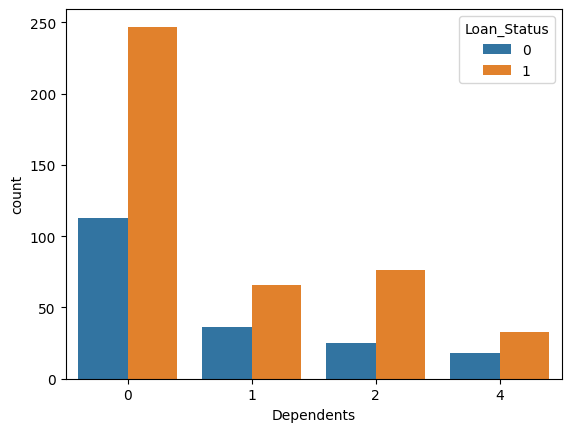

In [31]:
# now do the same for the dependents and Loan status

sns.countplot(x='Dependents', hue='Loan_Status', data=train_loan_df)

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

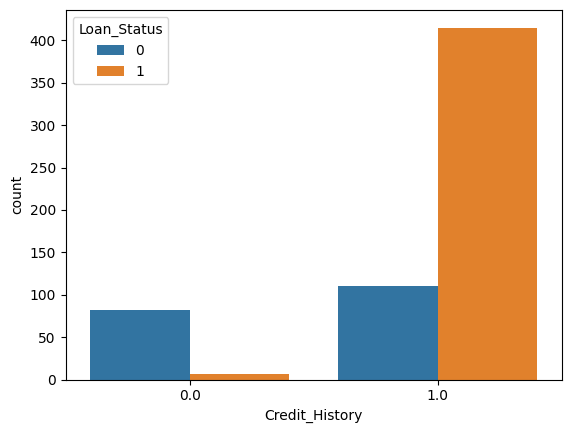

In [32]:

# now do the same for the Credit_History and Loan status

sns.countplot(x='Credit_History', hue='Loan_Status', data=train_loan_df)

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

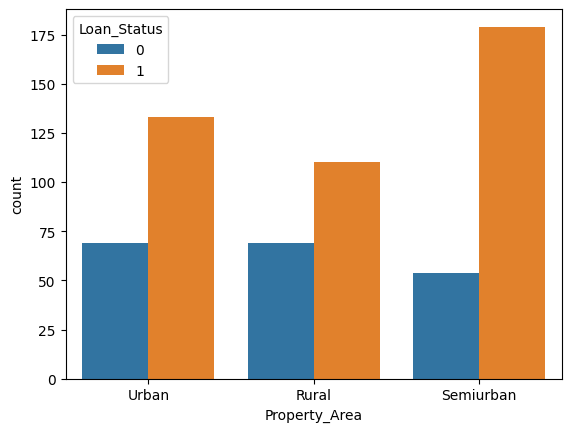

In [33]:

# now do the same for the Property_Area and Loan status

sns.countplot(x='Property_Area', hue='Loan_Status', data=train_loan_df)

In [34]:
# now check the values of the Property area to ensure whether it is changed or not

train_loan_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [35]:
# now we are going to convert the features which contains categorical values into numerical values

train_loan_df.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


In [36]:
# to check the updated values

train_loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [37]:
# to check the co-relation

train_loan_df_corr = train_loan_df.corr()
train_loan_df_corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,-0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Education,-0.045364,-0.012304,1.000000,0.010383,0.140760,0.062290,0.168759,0.073928,0.073658,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,0.065243,-0.030860,-0.009500,0.010522,-0.046632,-0.076120,0.001963,1.000000,0.032112


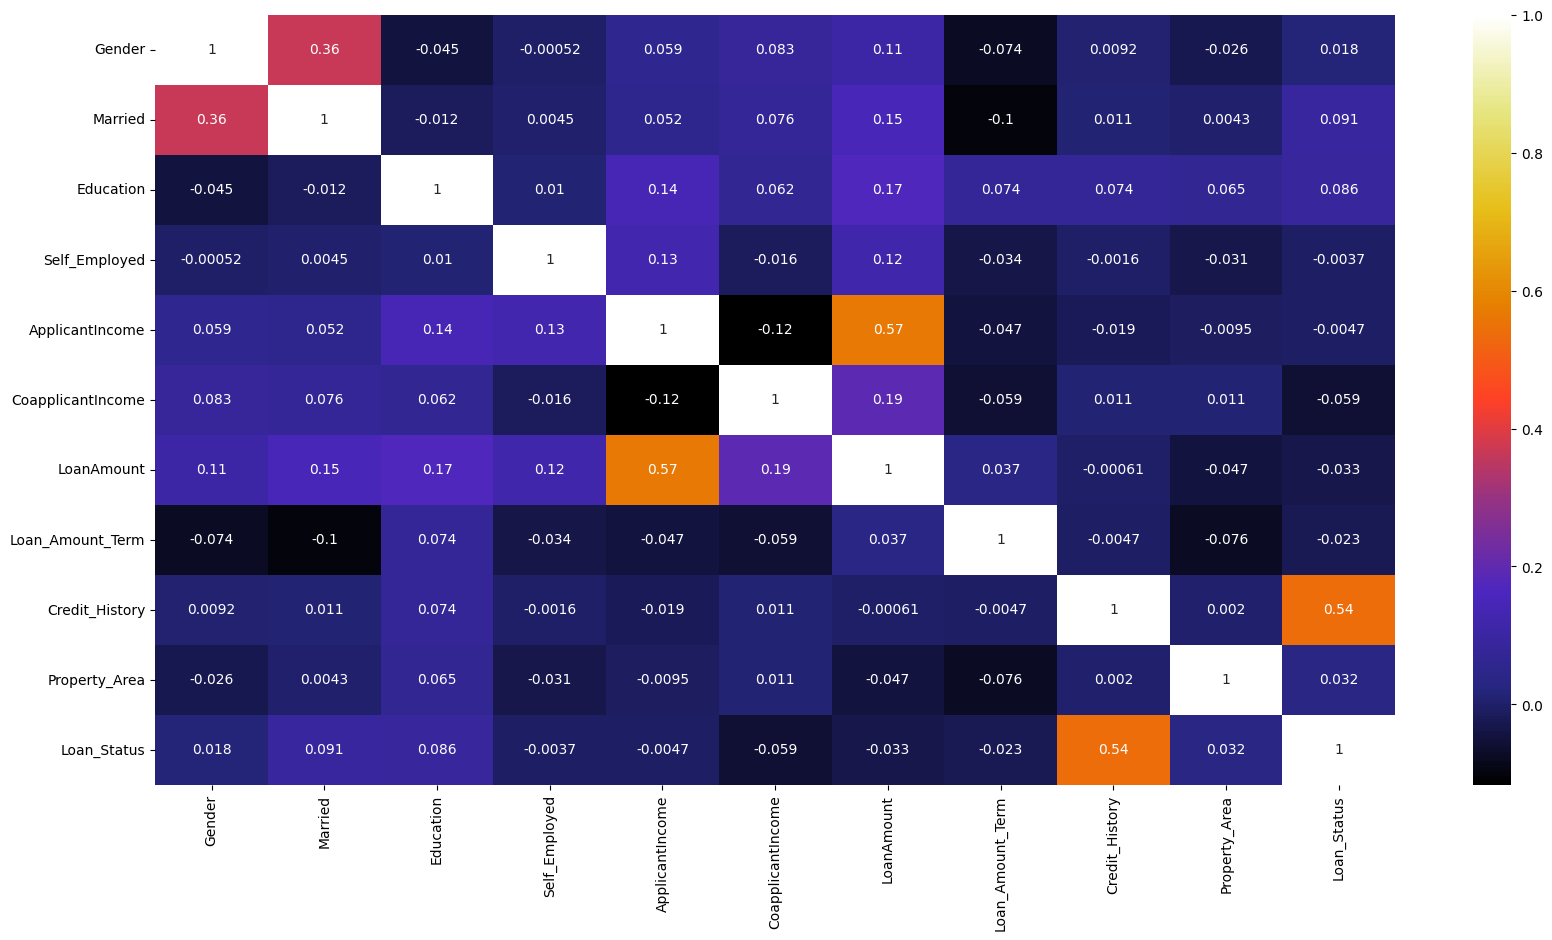

In [38]:
# to get the heat map

plt.figure(figsize=(20,10))
sns.heatmap(train_loan_df_corr, cmap='CMRmap', annot= True)
plt.show()

In [39]:
# now we are separating the data and the label

X = train_loan_df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = train_loan_df['Loan_Status']

In [40]:
# to get the datas of X and Y 

print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [41]:
# now we are going to do split the data by using train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=3)


In [42]:
# to check the shape of X, X_train, X_test

print(X.shape, X_train.shape, X_test.shape)

(614, 11) (491, 11) (123, 11)


# #SVM (Support Vector Machine)

In [43]:
# now we are going to train our model

classifier = svm.SVC(kernel='linear')

In [44]:
# to fit our model

classifier.fit(X_train,Y_train)

SVC(kernel='linear')

 Now we are going to do model evaluation.
 Basically if our accuracy is more than or equal to 75 %, it is said to be a good model

In [45]:
# finding accuracy data on the training data

X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [46]:
# to get the accuracy score value

print('Accuracy score on the Training data: ',training_data_accuracy)

Accuracy score on the Training data:  0.7922606924643585


In [47]:
# finding accuracy data on the test data

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [48]:
# to get the accuracy score value

print('Accuracy score on the Test data: ',test_data_accuracy)

Accuracy score on the Test data:  0.8292682926829268


# Lets try with other models

In [49]:
# import the necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
# training the model

lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [51]:
# fitting the model

lr.fit(X_train,Y_train)
knn.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
rf.fit(X_train,Y_train)


Training completed


In [52]:
# to check the scores 

print(lr.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(dt.score(X_test,Y_test))
print(rf.score(X_test,Y_test))

0.8292682926829268
0.6178861788617886
0.7398373983739838
0.7967479674796748


In [53]:
# predicting 

lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

In [98]:
# to get the accuracy score for the models

print('Accuracy score of Logistic Regression:',accuracy_score(Y_test,lr_pred)*100)
print('Accuracy score of KNN :',accuracy_score(Y_test,knn_pred)*100)
print('Accuracy score of Decision Tree :', accuracy_score(Y_test,dt_pred)*100)
print('Accuracy score of Random Forest :',accuracy_score(Y_test,rf_pred)*100)
print('Accuracy score of SVM : ',test_data_accuracy*100)

Accuracy score of Logistic Regression: 82.92682926829268
Accuracy score of KNN : 61.78861788617886
Accuracy score of Decision Tree : 73.98373983739837
Accuracy score of Random Forest : 79.67479674796748
Accuracy score of SVM :  82.92682926829268


From the above models, it is clear that both the Logistic Regression and SVM has higher accuracy score when compared to the other models and the accuracy score of the both models are similar. So we are going to use SVM model for validating the seperate test dataset which was already provided.

In [68]:
# Loading the test dataset and do the data pre processing work as we did for the training dataset

test_loan_df = pd.read_csv('Loan_Status_test.csv')

In [69]:
# to get the first five rows

test_loan_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [70]:
# to get the last five rows

test_loan_df.tail()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [71]:
# to get the shape of the datafrane (i.e) the no.of rows and columns

test_loan_df.shape

(367, 12)

In [72]:
# to get the info of the dataframe

test_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [73]:
# to get the statistical data

test_loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [74]:
# to get the unique values

test_loan_df.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [75]:
# to get no.of.features

test_loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [76]:
# to get the types of the features

test_loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [77]:
# to get the no.of.missing values in each columns

test_loan_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [78]:
# here insted of imputing we are going to drop the missing values

test_loan_df = test_loan_df.dropna()

In [79]:
# now check if there is any missing values after doing dropping

test_loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [80]:
# now check the shape of the dataframe

test_loan_df.shape

(289, 12)

In [81]:
# here in the dependents feature we can't accept the values as 3+,it'll affect the performance of the model, so we are goingbto replace it by 4

test_loan_df = test_loan_df.replace(to_replace='3+', value=4)

In [82]:
# to check the changed value

test_loan_df['Dependents'].value_counts()

0    167
2     50
1     42
4     30
Name: Dependents, dtype: int64

In [83]:
# now we are going to convert the features which contains categorical values into numerical values

test_loan_df.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


In [84]:
# to check the updated values

test_loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2
5,LP001054,1,1,0,0,1,2165,3422,152.0,360.0,1.0,2


In [85]:
# drop the unwanted feature in the test dataset

X_test_new = test_loan_df.drop(columns=['Loan_ID'],axis=1)

In [86]:
X_test_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2
5,1,1,0,0,1,2165,3422,152.0,360.0,1.0,2


In [87]:
# to get the output for the test dataset

test_validation = classifier.predict(X_test_new)

In [91]:
test_validation

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [92]:
# to assign the test validated values to the test dataframe

test_loan_df['Predicted_Loan_Status'] = test_validation

In [93]:
test_loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,1
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,1
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,1
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,1
5,LP001054,1,1,0,0,1,2165,3422,152.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,1,1,1,1,0,2269,2167,99.0,360.0,1.0,1,1
362,LP002971,1,1,4,0,1,4009,1777,113.0,360.0,1.0,2,1
363,LP002975,1,1,0,1,0,4158,709,115.0,360.0,1.0,2,1
365,LP002986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0,1


In [94]:
# to set labels for the binary values in the predicted loan status

test_loan_df.Predicted_Loan_Status.replace({1:'Yes', 0:'No'}, inplace = True)

In [95]:
test_loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,Yes
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,Yes
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,Yes
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,Yes
5,LP001054,1,1,0,0,1,2165,3422,152.0,360.0,1.0,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,1,1,1,1,0,2269,2167,99.0,360.0,1.0,1,Yes
362,LP002971,1,1,4,0,1,4009,1777,113.0,360.0,1.0,2,Yes
363,LP002975,1,1,0,1,0,4158,709,115.0,360.0,1.0,2,Yes
365,LP002986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0,Yes


Here comes an end. 

We have built 5 models for the loan status prediction problem, in that the SVM and Logistic Regression has the highest accuracy score of 83% when compared to the other models. So we have used SVM model to predict the loan status of the seperately given test dataset. 